In [1]:
import numpy as np

import matplotlib.pyplot as plt
import glob
#%matplotlib inline
import pyfits
import scipy.optimize as optimization
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Times']})

In [2]:
import matplotlib.rcsetup as rcsetup
print(rcsetup.all_backends)

%matplotlib inline
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt


[u'GTK', u'GTKAgg', u'GTKCairo', u'MacOSX', u'Qt4Agg', u'Qt5Agg', u'TkAgg', u'WX', u'WXAgg', u'GTK3Cairo', u'GTK3Agg', u'WebAgg', u'nbAgg', u'agg', u'cairo', u'gdk', u'pdf', u'pgf', u'ps', u'svg', u'template']


In [3]:
datadir = "/Volumes/VIRT-Data/20170705/"

In [4]:
biglist_dark=glob.glob(datadir+'dark*')

In [5]:
def createlist(bl, E, T):
    smalllist_dark = []
    for darks in bl:
        myfile=pyfits.open(darks)
        head1=myfile[0].header
        if float(head1['EXPOSURE']) == E and float(head1['TEMPCCD']) == T:
            smalllist_dark.append(darks)
    return smalllist_dark

In [6]:
#worklist = createlist(biglist_dark, 1.0, -15)
#worklist2 = createlist(biglist_dark, 2.0, -15)
#worklist5 = createlist(biglist_dark, 5.0, -15)
#worklist10 = createlist(biglist_dark, 10.0, -15)
#worklist20 = createlist(biglist_dark, 20.0, -15)
#worklist60 = createlist(biglist_dark, 60.0, -15)
#worklist120 = createlist(biglist_dark, 120.0, -15)

In [7]:
def calcmean(wl):
    mean_counts = []
    for darks in wl:
        myfile=pyfits.open(darks)
        mean_counts.append(float(np.mean(myfile[0].data)))
        myfile.close()
        
    return mean_counts

In [8]:
#mean_csml1 = calcmean(worklist)
#mean_csml2 = calcmean(worklist2)
#mean_csml5 = calcmean(worklist5)
#mean_csml10 = calcmean(worklist10)
#mean_csml20 = calcmean(worklist20)
#mean_csml60 = calcmean(worklist60)
#mean_csml120 = calcmean(worklist120)


In [9]:
def calcmean2(wl):    
    mean_counts = []
    for darks in wl:
        myfile=pyfits.open(darks)
        mean_counts.append(float(np.mean(myfile[0].data)))
        myfile.close()
    
    return [np.mean(mean_counts), np.std(mean_counts)]


In [10]:
test1= calcmean2(createlist(biglist_dark, 1.0, -15))
test2= calcmean2(createlist(biglist_dark, 2.0, -15))
test3= calcmean2(createlist(biglist_dark, 5.0, -15))
test4= calcmean2(createlist(biglist_dark, 10.0, -15))
test5= calcmean2(createlist(biglist_dark, 20.0, -15))
test6= calcmean2(createlist(biglist_dark, 60.0, -15))
test7= calcmean2(createlist(biglist_dark, 120.0, -15))

In [11]:
#mean1s, std1s= calcmean2(worklist)
#mean2s, std2s = calcmean2(worklist2)
#mean5s, std5s = calcmean2(worklist5)
#mean10s, std10s = calcmean2(worklist10)
#mean20s, std20s = calcmean2(worklist20)
#mean60s, std60s = calcmean2(worklist60)
#mean120s, std120s = calcmean2(worklist120)

In [12]:
means = (test1[0], test2[0], test3[0], test4[0], test5[0], test6[0], test7[0])
stds= (test1[1], test2[1], test3[1], test4[1], test5[1], test6[1], test7[1])

In [13]:
t1= calcmean2(createlist(biglist_dark, 1.0, -20))
t2= calcmean2(createlist(biglist_dark, 2.0, -20))
t3= calcmean2(createlist(biglist_dark, 5.0, -20))
t4= calcmean2(createlist(biglist_dark, 10.0, -20))
t5= calcmean2(createlist(biglist_dark, 20.0, -20))
t6= calcmean2(createlist(biglist_dark, 60.0, -20))
t7= calcmean2(createlist(biglist_dark, 120.0, -20))

In [14]:
ma= (t1[0], t2[0], t3[0], t4[0], t5[0], t6[0], t7[0])
st= (t1[1], t2[1], t3[1], t4[1], t5[1], t6[1], t7[1])

In [15]:
s1= calcmean2(createlist(biglist_dark, 1.0, -25))
s2= calcmean2(createlist(biglist_dark, 2.0, -25))
s3= calcmean2(createlist(biglist_dark, 5.0, -25))
s4= calcmean2(createlist(biglist_dark, 10.0, -25))
s5= calcmean2(createlist(biglist_dark, 20.0, -25))
s6= calcmean2(createlist(biglist_dark, 60.0, -25))
s7= calcmean2(createlist(biglist_dark, 120.0, -25))

In [16]:
m_a= (s1[0], s2[0], s3[0], s4[0], s5[0], s6[0], s7[0])
s_t= (s1[1], s2[1], s3[1], s4[1], s5[1], s6[1], s7[1])

In [17]:
e1= calcmean2(createlist(biglist_dark, 1.0, -25))
e2= calcmean2(createlist(biglist_dark, 2.0, -25))
e3= calcmean2(createlist(biglist_dark, 5.0, -25))
e4= calcmean2(createlist(biglist_dark, 10.0, -25))
e5= calcmean2(createlist(biglist_dark, 20.0, -25))
e6= calcmean2(createlist(biglist_dark, 60.0, -25))
e7= calcmean2(createlist(biglist_dark, 120.0, -25))

In [18]:
m_e= (e1[0], e2[0], e3[0], e4[0], e5[0], e6[0], e7[0])
s_s= (e1[1], e2[1], e3[1], e4[1], e5[1], e6[1], e7[1])

In [19]:
p1= calcmean2(createlist(biglist_dark, 1.0, -30))
p2= calcmean2(createlist(biglist_dark, 2.0, -30))
p3= calcmean2(createlist(biglist_dark, 5.0, -30))
p4= calcmean2(createlist(biglist_dark, 10.0, -30))
p5= calcmean2(createlist(biglist_dark, 20.0, -30))
p6= calcmean2(createlist(biglist_dark, 60.0, -30))
p7= calcmean2(createlist(biglist_dark, 120.0, -30))

In [20]:
m_s= (p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0])
s_d= (p1[1], p2[1], p3[1], p4[1], p5[1], p6[1], p7[1])

In [21]:
exposure2 = (1.0, 2.0, 5.0, 10.0, 20.0, 60.0, 120.0)

<IPython.core.display.Javascript object>


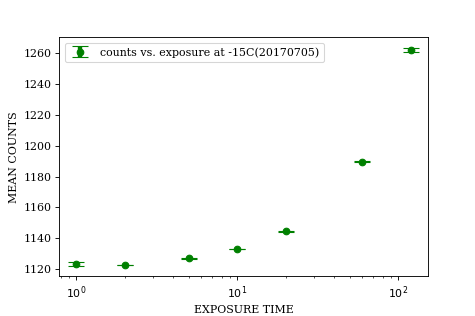

In [22]:
plt.errorbar(
    x = exposure2, label = 'counts vs. exposure at -15C(20170705)',
    y = means, 
    yerr = stds, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEAN COUNTS")
plt.legend()
plt.semilogx()
#plt.savefig("Errorbar15(05).pdf")
plt.show()

<IPython.core.display.Javascript object>


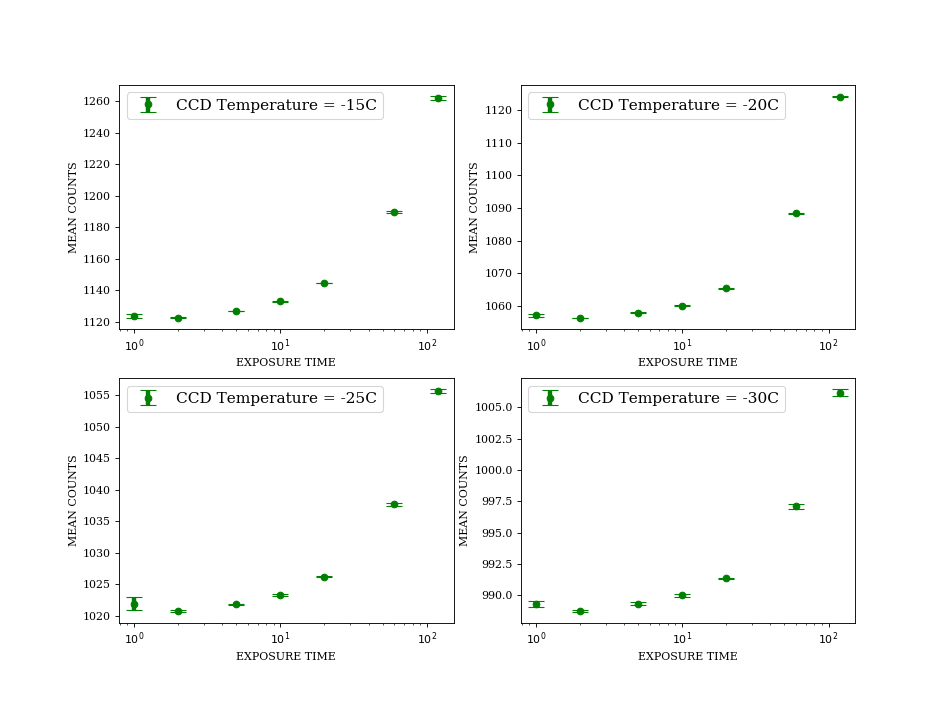

In [23]:
plt.figure(figsize = (12, 9))
plt.subplot(2,2,1)
#fig, axs = plt.subplots(2,2)
#fig.subplots_adjust(left = 0.08, right = 0.98, wspace = 0.3)

plt.errorbar(
    x = exposure2, label = 'CCD Temperature = -15C',
    y = means, 
    yerr = stds, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEAN COUNTS")
plt.legend(fontsize=14)
plt.semilogx()
plt.subplot(2,2,2)
plt.savefig("Errorbar15(05).pdf")

plt.errorbar(
    x = exposure2, label = 'CCD Temperature = -20C',
    y = ma, 
    yerr = st, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEAN COUNTS")
plt.legend(fontsize=14)
plt.semilogx()
plt.subplot(2,2,3)
plt.savefig("Errorbar20(05).pdf")


plt.errorbar(
    x = exposure2, label = 'CCD Temperature = -25C',
    y = m_e, 
    yerr = s_s, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEAN COUNTS")
plt.legend(fontsize=14)
plt.semilogx()
plt.subplot(2,2,4)
plt.savefig("Errorbar25(05).pdf")


plt.errorbar(
    x = exposure2, label = 'CCD Temperature = -30C',
    y = m_s, 
    yerr = s_d, linestyle = "", fmt = 'o', color = 'g', elinewidth = '4', capsize = 7) 
plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEAN COUNTS")
plt.legend(fontsize=14)
plt.semilogx()
#plt.savefig("Errorbar30(05).pdf")

plt.savefig("MCounts_TempVariation.pdf")
plt.show()


In [24]:
worklist = createlist(biglist_dark, 1.0, -15)
worklist2 = createlist(biglist_dark, 2.0, -15)
worklist5 = createlist(biglist_dark, 5.0, -15)
worklist10 = createlist(biglist_dark, 10.0, -15)
worklist20 = createlist(biglist_dark, 20.0, -15)
worklist60 = createlist(biglist_dark, 60.0, -15)
worklist120 = createlist(biglist_dark, 120.0, -15)

In [25]:
def func(x, m, t, n):
    return m + t*(x**n)*np.log10(x)

In [26]:
x0 = np.array([900.0,0.1,2.5])

In [27]:
print optimization.curve_fit(func, exposure2, means, x0, stds)

(array([  1.12198284e+03,   1.92534343e+00,   7.34082533e-01]), array([[ 0.08664358, -0.0298549 ,  0.0035691 ],
       [-0.0298549 ,  0.02526778, -0.00341723],
       [ 0.0035691 , -0.00341723,  0.00048009]]))


In [28]:
print optimization.curve_fit(func, exposure2, ma, x0, st)

(array([  1.05594275e+03,   5.87009872e-01,   8.40361308e-01]), array([[ 0.00123727, -0.00055229,  0.00019882],
       [-0.00055229,  0.00091136, -0.00033512],
       [ 0.00019882, -0.00033512,  0.00012428]]))


In [29]:
print optimization.curve_fit(func, exposure2, m_e, x0, s_s)

(array([  1.02079303e+03,   4.12459941e-01,   7.72374963e-01]), array([[ 0.0175951 , -0.00537266,  0.00269175],
       [-0.00537266,  0.00252109, -0.0012975 ],
       [ 0.00269175, -0.0012975 ,  0.00067525]]))


In [30]:
print optimization.curve_fit(func, exposure2, m_s, x0, s_d)

(array([  9.88797394e+02,   1.74321380e-01,   8.06970228e-01]), array([[ 0.01007006, -0.00194472,  0.00228102],
       [-0.00194472,  0.00056611, -0.00070224],
       [ 0.00228102, -0.00070224,  0.00089089]]))


<IPython.core.display.Javascript object>


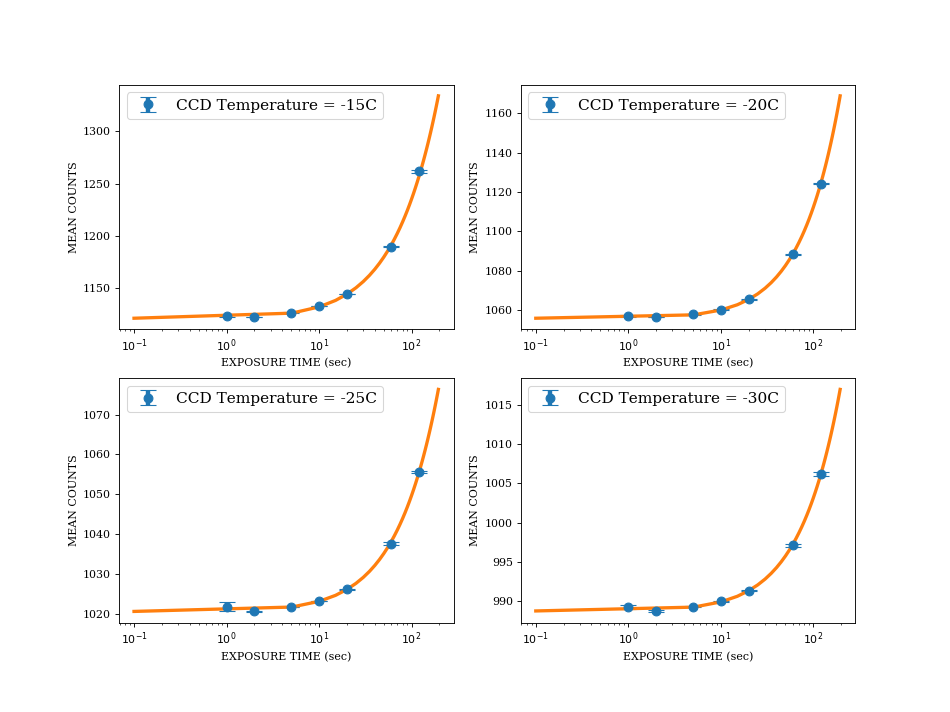

In [48]:
plt.figure(figsize = (12, 9))
plt.subplot(2,2,1)

plt.errorbar(exposure2, means, yerr=stds, fmt='o',linestyle = "", 
             elinewidth = '4', capsize = 7, markersize = 8,label = 'CCD Temperature = -15C')
plt.legend(fontsize=14)
xval=np.arange(0.1,200,5)
plt.plot(xval, 1.12198284e+03 + 1.92534343e+00* np.power(xval,7.34082533e-01)*np.log10(xval),lw=3)

plt.xlabel("EXPOSURE TIME (sec)"), plt.ylabel("MEAN COUNTS")
plt.semilogx()


plt.subplot(2,2,2)

plt.errorbar(exposure2, ma, yerr=st, fmt='o',linestyle = "", 
             elinewidth = '4', capsize = 7,markersize =8, label = 'CCD Temperature = -20C')
plt.legend(fontsize=14)
xval=np.arange(0.1,200,5)
plt.plot(xval, 1.05594275e+03 + 5.87009872e-01* np.power(xval,8.40361308e-01)*np.log10(xval),lw=3)
plt.xlabel("EXPOSURE TIME (sec)"), plt.ylabel("MEAN COUNTS")

plt.semilogx()
plt.subplot(2,2,3)

plt.errorbar(exposure2, m_e, yerr=s_s, fmt='o',linestyle = "",
             elinewidth = '4', capsize = 7,markersize = 8, label = 'CCD Temperature = -25C')
plt.legend(fontsize=14)
xval=np.arange(0.1,200,5)
plt.plot(xval, 1.02079303e+03 + 4.12459941e-01* np.power(xval,7.72374963e-01)*np.log10(xval),lw=3)
plt.xlabel("EXPOSURE TIME (sec)"), plt.ylabel("MEAN COUNTS")

plt.semilogx()
plt.subplot(2,2,4)

plt.errorbar(exposure2, m_s, yerr=s_d, fmt='o',linestyle = "", 
             elinewidth = '4', capsize = 7,markersize = 8, label = 'CCD Temperature = -30C')
plt.legend(fontsize=14)
xval=np.arange(0.1,200,5)
plt.plot(xval, 9.88797394e+02 + 1.74321380e-01* np.power(xval,8.06970228e-01)*np.log10(xval),lw=3)
plt.xlabel("EXPOSURE TIME (sec)"), plt.ylabel("MEAN COUNTS")

plt.semilogx()
plt.savefig("MCount_temp_fits.pdf")

plt.show()


In [32]:
datadir = "/Volumes/VIRT-Data/20170716/"
biglist_dark2=glob.glob(datadir+'dark*')

In [33]:

worklist005 = calcmean2(createlist(biglist_dark2, 0.05, -30))
worklist01 = calcmean2(createlist(biglist_dark2,0.1, -30))
worklist05 = calcmean2(createlist(biglist_dark2, 0.5, -30))
worklist1brice = calcmean2(createlist(biglist_dark2, 1, -30))

In [34]:
print worklist1brice

[995.70073394775386, 0.11493636214025206]


In [35]:
# creation of the arrays from the T=-30C

exposure2 = (1.0, 2.0, 5.0, 10.0, 20.0, 60.0, 120.0)
m_s= (p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0])
s_d= (p1[1], p2[1], p3[1], p4[1], p5[1], p6[1], p7[1])

expb=[0.05,0.1, 0.5,1.]
msb=(worklist005[0],worklist01[0],worklist05[0],worklist1brice[0])
sdb=(worklist005[1],worklist01[1],worklist05[1],worklist1brice[1])

<IPython.core.display.Javascript object>


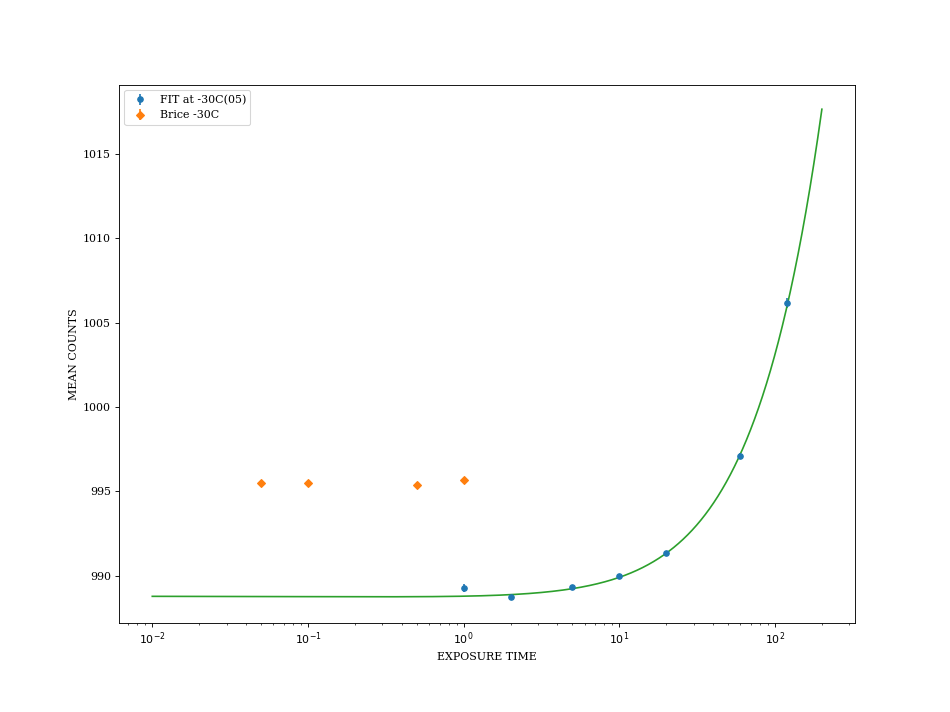

In [36]:
plt.figure(figsize = (12, 9))
plt.subplot(1,1,1)

plt.errorbar(exposure2, m_s, yerr=s_d, fmt='o',linestyle = "", markersize = '5', label = 'FIT at -30C(05)')
plt.errorbar(expb,msb,yerr=sdb,fmt=
        'D',ms=5,label='Brice -30C')

xval=np.arange(0.01,200,0.0005)
plt.plot(xval, 9.88797394e+02 + 1.74321380e-01* np.power(xval,8.06970228e-01)*np.log10(xval))



plt.semilogx()
plt.legend()

plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEAN COUNTS")

plt.savefig("fit_30C_all.pdf")

plt.show()

# Brice Data 
Dark Current closed filter and -10C

In [43]:
datadir = "/Volumes/VIRT-Data/20170630/"
biglist_dark2=glob.glob(datadir+'dark*')


In [44]:
#worklist000 = calcmean2(createlist(biglist_dark2, 0.0005, -10))
worklist001 = calcmean2(createlist(biglist_dark2, 0.001, -10))

worklist005 = calcmean2(createlist(biglist_dark2, 0.05, -10))
worklist01 = calcmean2(createlist(biglist_dark2,0.1, -10))
worklist05 = calcmean2(createlist(biglist_dark2, 0.5, -10))
worklist1brice = calcmean2(createlist(biglist_dark2, 1, -10))


In [45]:
print worklist001

[1200.1126989364625, 0.098773604598524328]


In [46]:
exposure2 = (1.0, 2.0, 5.0, 10.0, 20.0, 60.0, 120.0)
m_s= (p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0])
s_d= (p1[1], p2[1], p3[1], p4[1], p5[1], p6[1], p7[1])

expb=[0.001,0.05,0.1, 0.5,1.]
msb=(worklist001[0],worklist005[0],worklist01[0],worklist05[0],worklist1brice[0])
sdb=(worklist001[1],worklist005[1],worklist01[1],worklist05[1],worklist1brice[1])

<IPython.core.display.Javascript object>


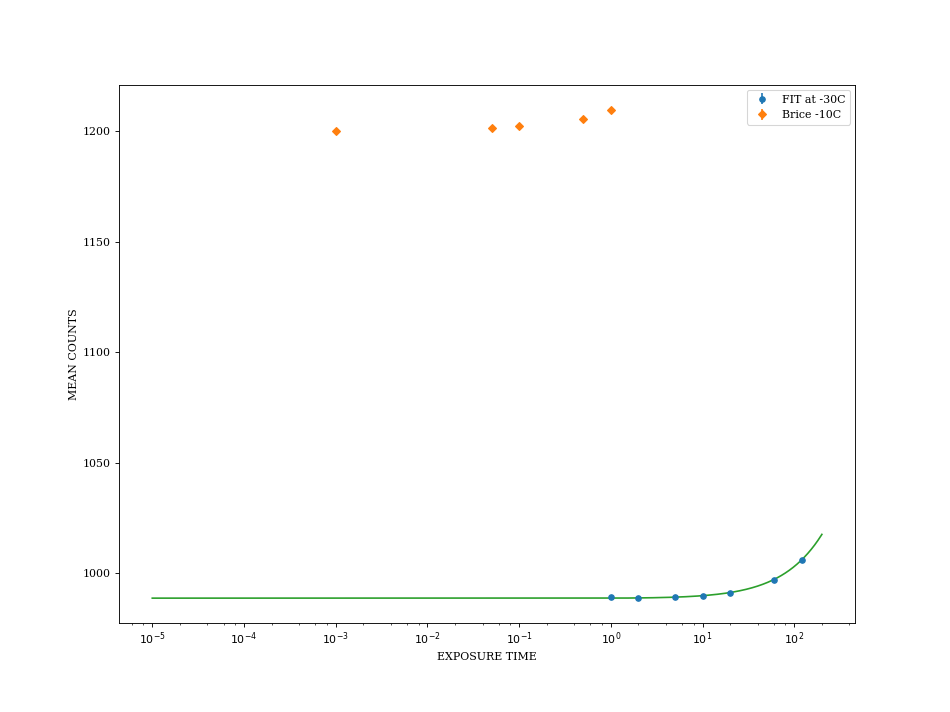

In [47]:
plt.figure(figsize = (12, 9))
plt.subplot(1,1,1)

plt.errorbar(exposure2, m_s, yerr=s_d, fmt='o',linestyle = "", markersize = '5', 
             label = 'FIT at -30C')
plt.errorbar(expb,msb,yerr=sdb,fmt=
        'D',ms=5,label='Brice -10C')

xval=np.arange(0.00001,200,0.0005)
plt.plot(xval, 9.88797394e+02 + 1.74321380e-01* np.power(xval,8.06970228e-01)*np.log10(xval))



plt.semilogx()
plt.legend()

plt.xlabel("EXPOSURE TIME"), plt.ylabel("MEAN COUNTS")

#plt.savefig("fit_30C_all.pdf")

plt.show()